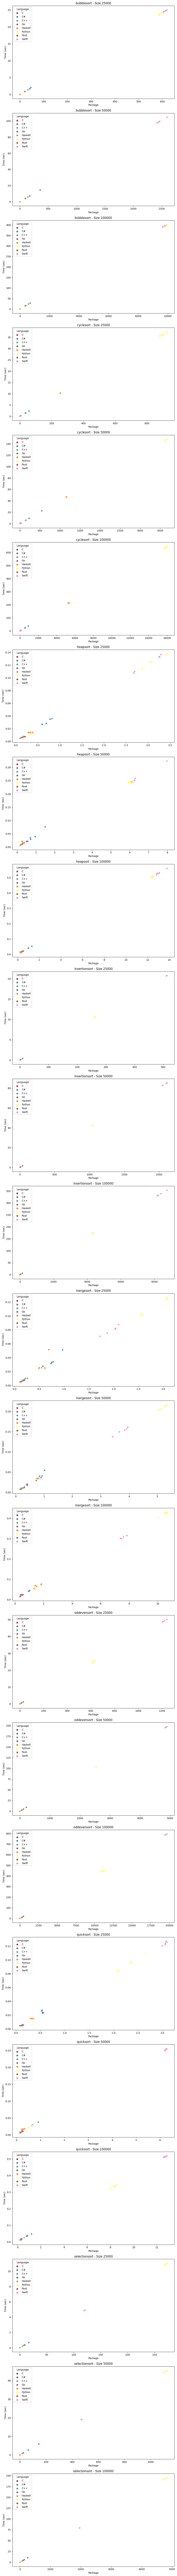

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def add_sizes_to_algorithms(algorithms):
    ans = []
    for alg in algorithms:
        ans.append((alg, 25000))
        ans.append((alg, 50000))
        ans.append((alg, 100000))
    return ans

# Assuming your dataset is stored in a CSV file called "data.csv"
data = pd.read_csv("../results/clean.csv")

algorithms = [
    "bubblesort",
    "cyclesort",
    "heapsort",
    "insertionsort",
    "mergesort",
    "oddevensort",
    "quicksort",
    "selectionsort"
]

# Filter the dataset for each algorithm and size combination
algorithm_sizes = add_sizes_to_algorithms(algorithms)
    # Add more algorithm and size combinations as needed

# Create subplots for each algorithm and size combination
num_plots = len(algorithm_sizes)
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 6 * num_plots))

# Iterate over the algorithm and size combinations
for i, (algorithm, size) in enumerate(algorithm_sizes):
    # Filter the data for the current algorithm and size
    filtered_data = data[(data["Algorithm"] == algorithm) & (data["Size"] == size)]

    # Pivot the filtered data to create a multi-index dataframe
    pivot_data = filtered_data.pivot_table(
        index=["Language", "Package"], values="Time(sec)", fill_value=0
    )

    # Reset the index to flatten the multi-index dataframe
    flat_data = pivot_data.reset_index()

    # Plot the relation between language, package, and time using a scatter plot
    ax = axes[i]
    sns.scatterplot(
        data=flat_data,
        x="Package",
        y="Time(sec)",
        hue="Language",
        palette="Set1",
        ax=ax,
    )

    # Set the title for the current subplot
    ax.set_title(f"{algorithm} - Size {size}")

    # Set the x-axis label
    ax.set_xlabel("Package")

    # Set the y-axis label
    ax.set_ylabel("Time (sec)")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
